# Preprocessing and Analysis

This section prepares the data before feeding it into machine learning models.

## Required Libraries

This part includes the necessary Python libraries for data processing, machine learning, and visualization. 

In [53]:
# required libraries
import os
import math
import time
from pathlib import Path
import tempfile
import functools
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
pd.set_option("display.max_rows", None)
import scipy, joblib
import scipy.signal
import scipy.stats
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,ConfusionMatrixDisplay,f1_score,recall_score,precision_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xg
from matplotlib.pyplot import figure
from matplotlib import pyplot
from IPython.display import display, clear_output
import logging
import keras
from keras.models import Sequential
import keras.backend as k
from keras.layers import Dense, GRU, LSTM, Activation, Masking, Dropout, BatchNormalization,Conv1D
from keras.callbacks import History
import keras.optimizers 
from keras import callbacks
#!pip install xgboost
from meteostat import Point, Daily, Hourly
from datetime import datetime, timedelta
import urllib
from urllib.error import HTTPError
import pickle
import requests
import folium
from folium.plugins import HeatMap, Draw, HeatMapWithTime
from tqdm.contrib.concurrent import process_map
import uuid
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

In [2]:
cache_dir = "data"
cache_dir = Path(tempfile.gettempdir()) if cache_dir is None else Path(cache_dir)
        
# make cache dir
cache_dir.mkdir(exist_ok=True, parents=True)

## Loading Final Generated Data

In [61]:
# final generated dataset is "train_ecoliall51_weather"
#datasetxx = pd.read_csv('data/train_ecoliall51_weather.csv')
table2 = pq.read_table('data/train_ecoliall51_weather.parquet')
datasetxx = table2.to_pandas()
datasetxx = datasetxx[['Temp Water', 'Sld Sus@105C', 'Ammonia(N)','Nitrate-N','Nitrite-N', 'Lat','Long','Phosphate','samplesamplingPoint',
                        'samplingPointnotation','timedate','time','date','E.coli C-MF','temperature_11am', 'humidity_11am',
                        'windspeed_11am', 'windgusts_11am', 'winddirection_11am',
                        'precipitation_11am', 'rain_11am', 'snowfall_11am', 'cloudcover_11am',
                        'pressure_msl_11am', 'soil_temp_7cm', 'soil_moist_7cm', 'vap_press_def',
                        'et0_fao_evap', 'sun_duration', 'global_tilted_irr', 'short_rad',
                        'dir_rad', 'dew_point_2m', 'temp_min', 'temp_max', 'precipitation_sum',
                        'rain_sum', 'snowfall_sum', 'windspeed_max', 'windgusts_max',
                        'winddirection_dominant', 'precipitation_hours',
                        'sunshine_duration_d', 'daylight_duration_d', 'short_rad_sum_d',
                        'et0_fao_evap_d', 'temp_min7', 'temp_max7', 'precipitation_sum7',
                        'rain_sum7', 'snowfall_sum7', 'windspeed_max7', 'windgusts_max7',
                        'winddirection_dominant7', 'precipitation_hours7',
                        'sunshine_duration_d7', 'daylight_duration_d7', 'short_rad_sum_d7',
                        'et0_fao_evap_d7']]
datasetxx.shape

(21064, 59)

In [3]:
datasetxx.head()

Temp Water  Sld Sus@105C  Ammonia(N)  Nitrate-N  Nitrite-N        Lat  \
0       21.00          18.0       0.100      1.670      0.028  53.187885   
1       13.70           5.3       1.370      0.900      0.100  52.709958   
2       17.23           7.0       0.052      9.440      0.009  55.548733   
3       12.30          16.0       0.165     10.300      0.086  54.083585   
4       16.40          40.0      35.000      0.187      0.036  54.070216   

       Long  Phosphate                                samplesamplingPoint  \
0 -2.883970      0.231  http://environment.data.gov.uk/water-quality/i...   
1 -0.600205      0.036  http://environment.data.gov.uk/water-quality/i...   
2 -1.632261      0.054  http://environment.data.gov.uk/water-quality/i...   
3 -0.194547      0.020  http://environment.data.gov.uk/water-quality/i...   
4 -0.227559      0.830  http://environment.data.gov.uk/water-quality/i...   

  samplingPointnotation  ...  rain_sum7 snowfall_sum7 windspeed_max7  \
0                NW-689  ...   4.900000           0.0      18.931340   
1           AN-CACKASS1  ...  13.500000           0.0      26.690691   
2           NE-42100095  ...   9.600001           0.0      20.561850   
3           NE-49000063  ...   8.500000           0.0      31.708675   
4           NE-49000066  ...   8.500000           0.0      31.708675   

   windgusts_max7  winddirection_dominant7  precipitation_hours7  \
0       38.699997                216.07090                   7.0   
1       50.399994                222.15851                  22.0   
2       36.765000                214.66931                  24.0   
3       50.805000                194.91590                  20.0   
4       50.805000                194.91590                  20.0   

   sunshine_duration_d7  daylight_duration_d7  short_rad_sum_d7  \
0             361418.72             487821.44            178.79   
1             172025.27             285106.30             46.19   
2             336300.56             471339.20            140.20   
3             301363.88             373050.53            107.10   
4             301363.88             373050.53            107.10   

   et0_fao_evap_d7  
0        31.926334  
1         9.526622  
2        23.048634  
3        20.048218  
4        20.048218  

[5 rows x 59 columns]

In [5]:
datasetxx.shape

(21064, 59)

## Outlier Removal

Generate season and time columns. And remove outlier samples. Outliers can significantly impact model performance. This step involves detecting and removing extreme values using Z-score analysis.

In [62]:
datasetxxt = datasetxx.drop(['timedate', 'samplingPointnotation', 'samplesamplingPoint'], axis=1)

datasetxxt['season'] = pd.DatetimeIndex(datasetxxt['date']).month%12 // 3 + 1 # Season
datasetxxt['time'] = pd.DatetimeIndex(datasetxxt['time']).hour
#datasetxxt = datasetxxt.drop(temp.iloc[40:,0], axis=1)
#datasetxxt = datasetxxt.drop(['build', 'others', 'season'], axis=1)
#datasetxxt = datasetxxt.drop(['Temp Water','Sld Sus@105C','Ammonia(N)','Nitrate-N','Nitrite-N','Phosphate'], axis=1)
datasetxxt = datasetxxt.dropna().reset_index(drop=True)

a = np.array(datasetxxt['E.coli C-MF'].values)
#datasetxxt['E.coli C-MF'] = np.where(a > 10000, 10000, a) # replace values with higher than 10k with 10k (can be deleted based on need)
# outlier removal using Z-score
for i in datasetxxt.columns:
    if not i == 'date':
        z = np.abs(stats.zscore(datasetxxt[i]))
        outlier_indices = np.where(z > 15)[0]
        print(datasetxxt[i][outlier_indices])
        datasetxxt = datasetxxt.drop(outlier_indices).reset_index(drop=True)
datasetxxt.shape

Series([], Name: Temp Water, dtype: float64)
2637      2430.0
2662      4950.0
11479     4890.0
13265     1950.0
13352     3610.0
14965     4970.0
16124     5610.0
18633    10000.0
Name: Sld Sus@105C, dtype: float64
1718      71.7
5846     134.0
7560     134.0
7707     198.0
11345    494.0
17290     79.3
17678    134.0
Name: Ammonia(N), dtype: float64
Series([], Name: Nitrate-N, dtype: float64)
864      1.10
1826     3.30
2493     5.20
2615     2.45
19389    1.50
19817    2.80
Name: Nitrite-N, dtype: float64
Series([], Name: Lat, dtype: float64)
Series([], Name: Long, dtype: float64)
20362    31.0
20699    31.0
Name: Phosphate, dtype: float64
Series([], Name: time, dtype: int32)
7632     4700000.0
15058    8727273.0
19539    1200000.0
Name: E.coli C-MF, dtype: float64
Series([], Name: temperature_11am, dtype: float64)
Series([], Name: humidity_11am, dtype: float64)
Series([], Name: windspeed_11am, dtype: float64)
Series([], Name: windgusts_11am, dtype: float64)
Series([], Name: winddir

(20988, 57)

## Data Split

The dataset is split into training and testing sets, ensuring that the model generalizes well to unseen data. The split ratio is 85-15.

Two training approach considered: 

**Random Geographic Split Training:** Trained on most of catchments and tested on the rest unseen catchments.
This method is suitable when new unseen catchments are under study.

**Random Temporal Split Training:** Trained on 85% of data samples for all catchments and tested on the remaining 15% of the dataset.
This method is suitable when current trained catchments are under study.

Choose the desired split and remove the other part:

In [63]:
#datasetxxt['E.coli C-MF'] = np.log10(datasetxxt['E.coli C-MF'])
y = datasetxxt['E.coli C-MF']
X = datasetxxt.drop(['E.coli C-MF','Lat', 'Long', 'date'], axis=1)#"snowfall_11am", "snowfall_sum","lai","rain_11am","rain_sum","rain_sum7"]
"""
# for Geographical Split
locations = datasetxxt[['Lat', 'Long']].drop_duplicates()
train_l, test_l = train_test_split(locations, test_size=0.15, random_state=41)
train = pd.merge(datasetxxt, train_l, on=['Lat', 'Long'])
test = pd.merge(datasetxxt, test_l, on=['Lat', 'Long'])
print('Number of training catchments: %.0f' %  train['Lat'].nunique())
print('Number of testing catchments: %.0f' %  test['Lat'].nunique())

X_train = train.drop(['E.coli C-MF','Lat', 'Long', 'date'], axis=1) #,"snowfall_11am", "snowfall_sum"
X_test = test.drop(['E.coli C-MF','Lat', 'Long', 'date'], axis=1) #,"snowfall_11am", "snowfall_sum"
y_train, y_test = train['E.coli C-MF'], test['E.coli C-MF']
"""

# for Temporal Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# replace values with higher than 10k with 10k (can be deleted based on need)
# helps the model to focus on lower E.coli consentration
a = np.array(y_train.values)
y_train = np.where(a > 10000, 10000, a) 

In [7]:
X_test.shape

(3149, 53)

### Show test and train locations on the map for Geographical Split

In [12]:
# Show test and train locations on the map for Geographical Split
import folium
import pandas as pd
import branca.colormap as cm
from scipy import stats
from utils import getradius1

grouped_data = train[['E.coli C-MF','Long','Lat']]
grouped_data = grouped_data.dropna().reset_index(drop=True)
grouped_data = grouped_data.groupby(["Lat", "Long"]).agg(
    ecoli_mean = ("E.coli C-MF","mean"),
    ecoli_count = ("E.coli C-MF","count")
).reset_index()

# Sample data generation (Replace this with your actual DataFrame)
df = grouped_data
df = df[df['Lat'] > 49.90] #Drop unwanted rows
df = df[df['Lat'] < 61] #Drop unwanted rows


m = folium.Map(location=[df['Lat'].median(), df['Long'].median()], zoom_start=5)

colormap = cm.LinearColormap(colors=['green', 'yellow'], vmin=0, vmax=1000000)

# Add circle markers for each location
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius= getradius1(row['ecoli_count']*100),  # Scale the radius according to the counts
        color=colormap(row['ecoli_mean']),  # Assign color based on intensity
        fill=True,
        fill_opacity=0.6,
        popup=f"Intensity: {row['ecoli_mean']}"
    ).add_to(m)
    
grouped_data = test[['E.coli C-MF','Long','Lat']]
grouped_data = grouped_data.dropna().reset_index(drop=True)
grouped_data = grouped_data.groupby(["Lat", "Long"]).agg(
    ecoli_mean = ("E.coli C-MF","mean"),
    ecoli_count = ("E.coli C-MF","count")
).reset_index()

# Sample data generation (Replace this with your actual DataFrame)
df = grouped_data
df = df[df['Lat'] > 49.90] #Drop unwanted rows
df = df[df['Lat'] < 61] #Drop unwanted rows

colormap = cm.LinearColormap(colors=['red', 'yellow'], vmin=0, vmax=10000000)


for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius= getradius1(row['ecoli_count']*100),  # Scale the radius according to the counts
        color=colormap(row['ecoli_mean']),  # Assign color based on intensity
        fill=True,
        fill_opacity=0.6,
        popup=f"Intensity: {row['ecoli_mean']}"
    ).add_to(m)

# Save map to an HTML file
m.save('ecoli_l.html')

m

## Distribution Analysis

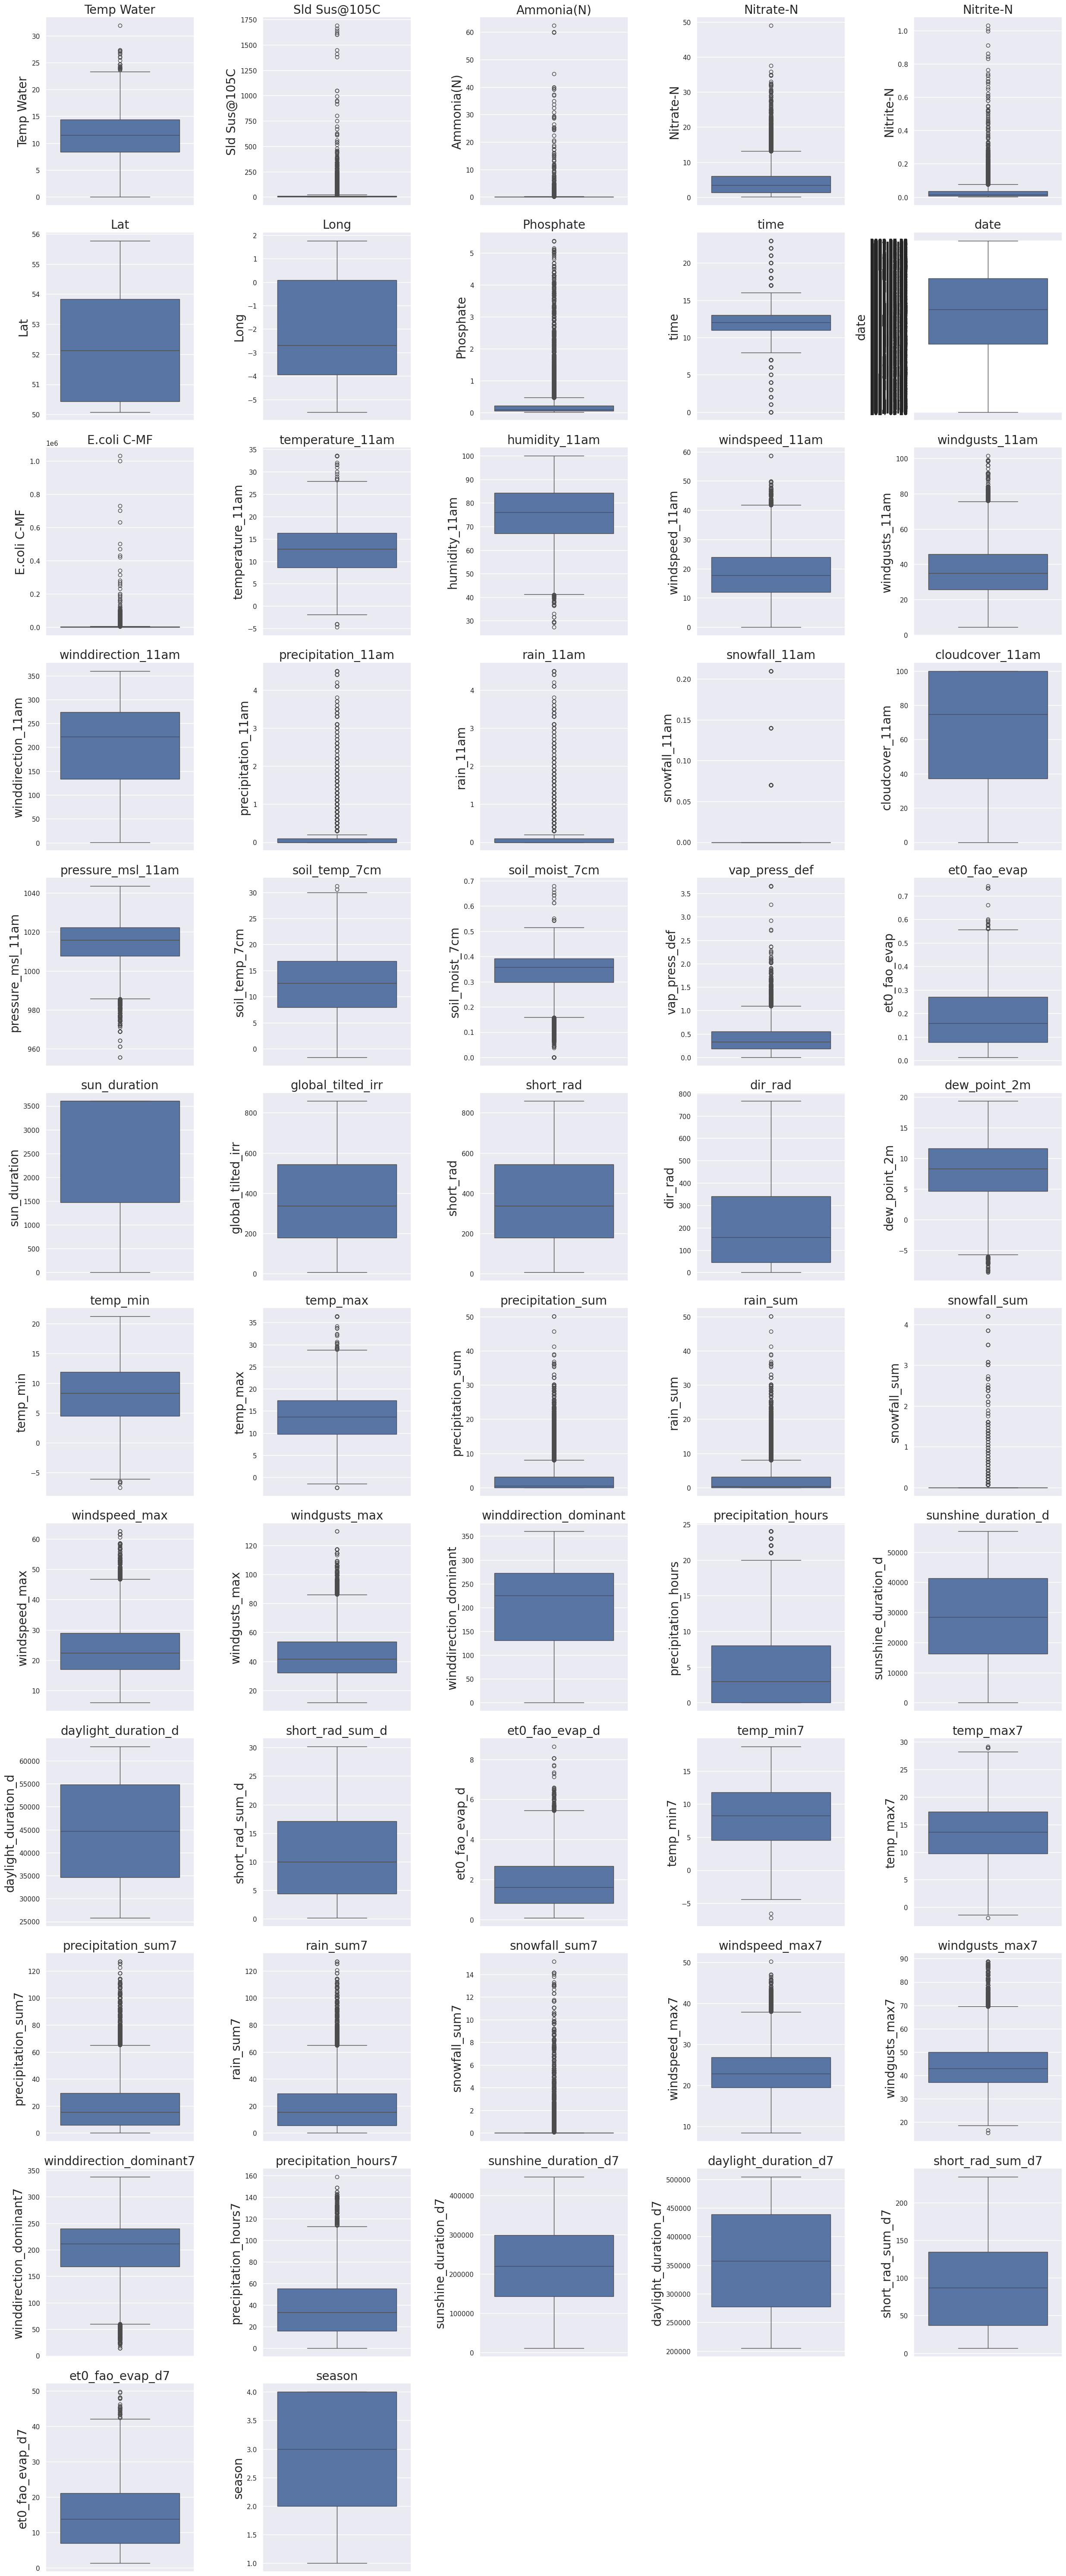

In [8]:
# distribution analysis
def plot_boxplots(df):
    i = 5
    num_columns = len(df.columns)
    num_rows = math.ceil(num_columns/i)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=min(i,num_columns), figsize=(5*min(i,num_columns), 5*num_rows))
    
    plt.rcParams['font.size'] = '16'
    axes = axes.flatten()
    if num_columns == 1:
        axes = [axes]

    for i, col in enumerate(df.columns):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'{col}' , fontsize=20)
        axes[i].set_ylabel(col, fontsize=20)
    
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

plot_boxplots(datasetxxt)

In [16]:
# this code duplicates the minority class (Ecoli > 1000)(can be ignored, didnt effected accuracy)

X2 = pd.concat([X_train,pd.DataFrame({'E.coli C-MF': y_train})],axis=1)
# Define the threshold to filter for minority class (Ecoli > 1000)
df_majority = X2[X2['E.coli C-MF'] <= 1000]
df_minority = X2[X2['E.coli C-MF'] > 1000]

# Calculate how many times to duplicate the minority class to match the size of the majority class
majority_count = len(df_majority)
minority_count = len(df_minority)

# Duplicate the minority class to balance the dataset
duplication_factor = majority_count // minority_count
df_minority_duplicated = pd.concat([df_minority] * duplication_factor, ignore_index=True)

# If there's still a difference, we randomly sample the remaining instances
remaining_samples = majority_count - len(df_minority_duplicated)
if remaining_samples > 0:
    df_minority_duplicated = pd.concat([df_minority_duplicated, df_minority.sample(remaining_samples, replace=True)], ignore_index=True)

# Combine the duplicated minority data with the majority data
df_balanced = pd.concat([df_majority, df_minority_duplicated], axis=0).reset_index(drop=True)

# Shuffle the dataset to ensure random distribution
X2 = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = X2['E.coli C-MF']
X_train = X2.drop(['E.coli C-MF'], axis=1)

len(X2) # was not helping

23920

## Feature Importance

Feature importance analysis determines which variables contribute most to predictions. Techniques like Random Forest Feature Importance or XGBoost’s built-in feature importance are common.

Temp Water Score: 0.01782
Sld Sus@105C Score: 0.18918
Ammonia(N) Score: 0.08853
Nitrate-N Score: 0.06377
Nitrite-N Score: 0.03233
Phosphate Score: 0.05278
time Score: 0.00906
temperature_11am Score: 0.00957
humidity_11am Score: 0.01410
windspeed_11am Score: 0.01117
windgusts_11am Score: 0.01216
winddirection_11am Score: 0.01093
precipitation_11am Score: 0.00376
rain_11am Score: 0.00347
snowfall_11am Score: 0.00016
cloudcover_11am Score: 0.00853
pressure_msl_11am Score: 0.02679
soil_temp_7cm Score: 0.01093
soil_moist_7cm Score: 0.03117
vap_press_def Score: 0.01189
et0_fao_evap Score: 0.00926
sun_duration Score: 0.00114
global_tilted_irr Score: 0.00611
short_rad Score: 0.00649
dir_rad Score: 0.00710
dew_point_2m Score: 0.02054
temp_min Score: 0.01880
temp_max Score: 0.01226
precipitation_sum Score: 0.01880
rain_sum Score: 0.02005
snowfall_sum Score: 0.00035
windspeed_max Score: 0.00951
windgusts_max Score: 0.01108
winddirection_dominant Score: 0.01256
precipitation_hours Score: 0.01154
s

<Axes: xlabel='Importance', ylabel='Feature'>

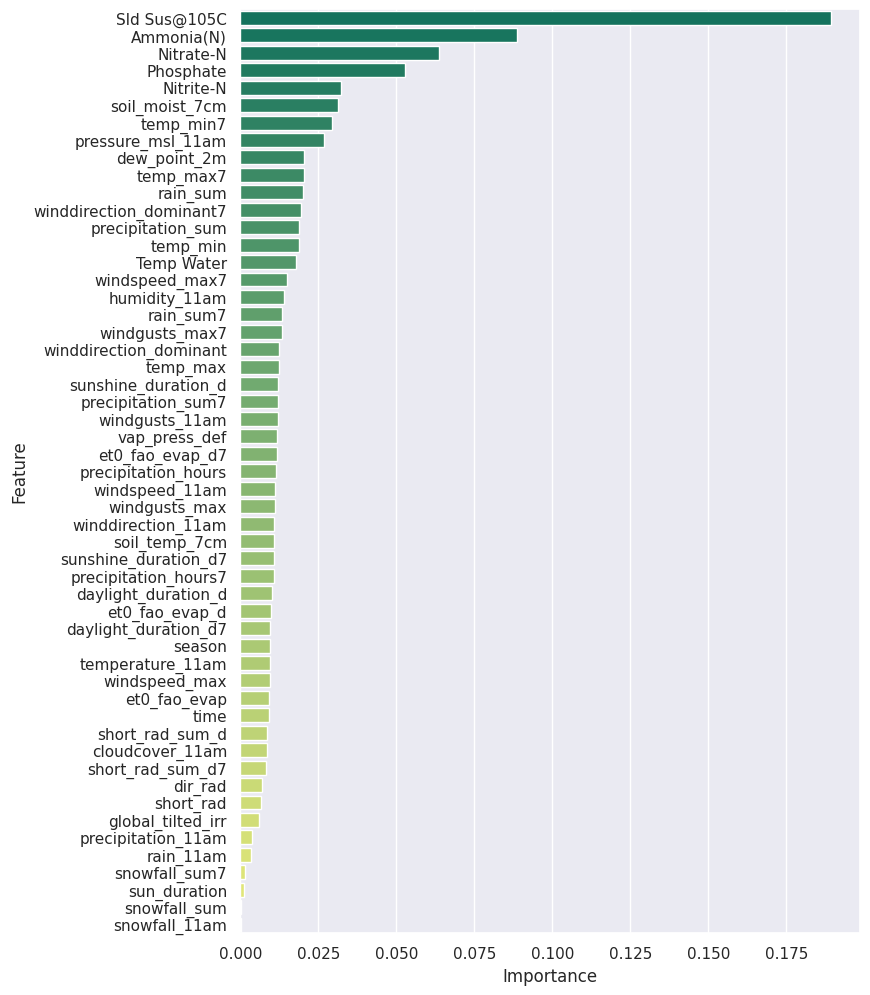

In [9]:
# feature importance analysis
#model = xg.XGBRegressor()
model = RandomForestRegressor(n_estimators=10)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(X.columns[i] + ' Score: %.5f' % (v))
# plot feature importance
temp = pd.concat([pd.Series(X.columns),pd.Series(model.feature_importances_)],axis=1)
temp.columns = ['Feature','Importance']
temp = temp.sort_values('Importance',ascending=False)
plt.figure(figsize=(8,12))
sns.barplot(x='Importance',y='Feature',data=temp,orient='h',palette='summer')

Temp Water Score: 0.05002
Sld Sus@105C Score: 0.12537
Ammonia(N) Score: 0.04513
Nitrate-N Score: -0.05143
Nitrite-N Score: 0.04775
Lat Score: 0.04519
Long Score: -0.05277
Phosphate Score: 0.06301
E.coli C-MF Score: 1.00000
temperature_11am Score: 0.03734
humidity_11am Score: 0.05883
windspeed_11am Score: 0.03918
windgusts_11am Score: 0.04651
winddirection_11am Score: 0.01176
precipitation_11am Score: 0.09884
rain_11am Score: 0.09901
snowfall_11am Score: -0.00060
cloudcover_11am Score: 0.04973
pressure_msl_11am Score: -0.08399
soil_temp_7cm Score: 0.03931
soil_moist_7cm Score: 0.05162
vap_press_def Score: -0.03248
et0_fao_evap Score: -0.01785
sun_duration Score: -0.03933
global_tilted_irr Score: -0.02082
short_rad Score: -0.02082
dir_rad Score: -0.02574
dew_point_2m Score: 0.06983
temp_min Score: 0.06795
temp_max Score: 0.03437
precipitation_sum Score: 0.14052
rain_sum Score: 0.14061
snowfall_sum Score: 0.00504
windspeed_max Score: 0.04514
windgusts_max Score: 0.05077
winddirection_domi

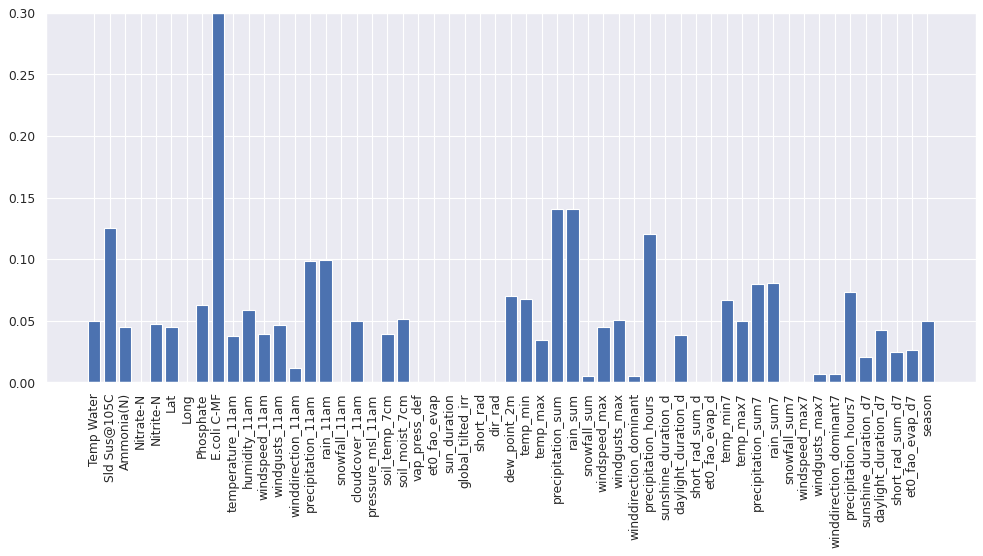

In [10]:
list2 = datasetxxt['E.coli C-MF']
columns = datasetxxt.drop(['date','time'], axis=1).columns
corr = []
for i, v in enumerate(columns):
    list1 = datasetxxt[v].to_numpy()
    # Apply the pearsonr()
    nas = np.logical_or(pd.isnull(list1), pd.isnull(list2))
    cor, _ = pearsonr(list1[~nas], list2[~nas])
    print(columns[i] + ' Score: %.5f' % (cor))
    corr.append(cor)

figure(figsize=(15, 6), dpi=80)
pyplot.bar([x for x in range(len(corr))], corr)
pyplot.xticks(range(len(corr)), columns, rotation=90)
pyplot.ylim(0,0.3)
pyplot.show()

## Normalization

Data normalization ensures that all numerical features are on a similar scale, preventing models from being biased toward large-valued features. MinMax scaling or Standard scaling (Z-score normalization) is used.

The Normalization scales are saved to be used in the inference phase.

In [64]:
Scaler = MinMaxScaler().fit(X_train)#MinMaxScaler
X_trainN = Scaler.transform(X_train)
Scaler1 = StandardScaler().fit(y_train.reshape(-1, 1))
y_trainN = Scaler1.transform(y_train.reshape(-1, 1))

"""scaler_filename = "Scaler.save"
joblib.dump(Scaler, scaler_filename) 
scaler_filename = "Scaler1.save"
joblib.dump(Scaler1, scaler_filename)"""

X_testN = Scaler.transform(X_test)
y_testN = Scaler1.transform(y_test.to_numpy().reshape(-1, 1))

In [368]:
# this is a an extra feature importance analysis conducted on train set.
# this approach evaluates different features and selects the set that results in the best model performance based on cross-validation.
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')
# Initialize the model
model = xg.XGBRegressor(objective='reg:absoluteerror',n_estimators = 20,seed = 12)

# Initialize Sequential Feature Selector
sfs = SFS(model,
          k_features='best', # can be a number of selected features
          forward=True,
          floating=False,
          scoring='neg_mean_absolute_error',
          cv=5,
         n_jobs=8)

# Fit SFS
sfs = sfs.fit(X_trainN, y_trainN)

# Get the selected features
selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)
# X_trainN[:,[int(i) for i in list(sfs.k_feature_names_)]]

Selected features: ['1', '2', '5', '8', '9', '10', '24', '25', '57', '59']


# E.coli Estimators

This section focuses on different machine learning models used for regression tasks, estimating E. coli concentration (No/100ml).

## XGBRegressor E.coli Estimator

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm known for its high accuracy and efficiency in handling structured data.

In [68]:
# XGBRegressor E.coli Estimator
xgboost = xg.XGBRegressor(objective='reg:squarederror',n_estimators = 30, seed = 12) 
xgboost.fit(X_trainN, y_trainN)

#save model
"""
with open('modelxgb.pkl', 'wb') as f:
    pickle.dump(xgboost, f)"""
y_pre_tr = xgboost.predict(X_trainN)

print('Train RMSE:{}'.format(np.sqrt(mean_squared_error(Scaler1.inverse_transform(y_trainN).reshape(-1, 1),
                                                        Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1))))))

Train RMSE:1546.2122706730393


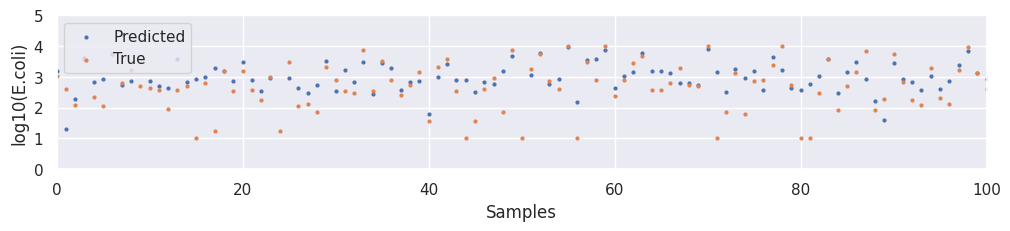

In [69]:
"""
plt.figure(figsize=(10,2))
plt.plot(Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1)), label=' XGBoost Predicted')
plt.plot(y_train,label="True")            
plt.ylabel("E.coli")
plt.xlabel("Sample")
plt.legend(loc='upper left')
plt.ylim(0,10000)
plt.xlim(0,100)
plt.show()
"""
plt.figure(figsize=(12,2))
plt.scatter(range(len(y_pre_tr)),np.log10(Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1))), label='Predicted', s=4)
plt.scatter(range(len(y_pre_tr)),np.log10(Scaler1.inverse_transform(y_trainN).reshape(-1, 1)),label="True", s=4)            
plt.ylabel("log10(E.coli)")
plt.xlabel("Samples")
plt.legend(loc='upper left')
plt.ylim(0,5)
plt.xlim(0,100)
plt.show()

In [70]:
y_pre = xgboost.predict(X_testN)
y_pre = Scaler1.inverse_transform(y_pre.reshape(-1, 1))
y_pre[y_pre<0] = 0 # replace negative prediction with zero


# to calculate RMSE we need to also down scale the test samples as well
a = np.array(y_test.values)
y_test1 = np.where(a > 10000, 10000, a) 

print('Test RMSE:{}'.format(np.sqrt(mean_squared_error(y_test1,
                                                        y_pre))))

Test RMSE:2060.763072289647


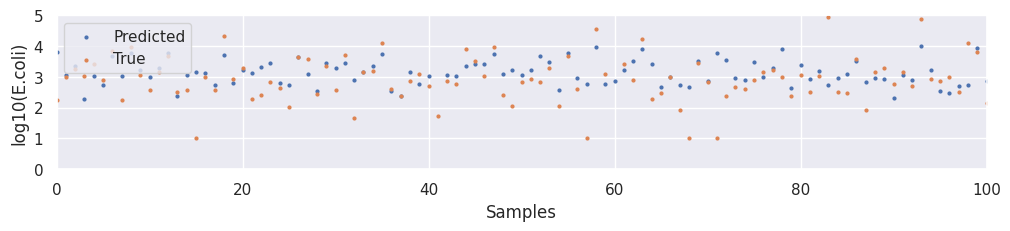

In [71]:
"""plt.figure(figsize=(10,2))
plt.plot( y_pre, label='Predicted')
plt.plot(y_test.to_numpy(),label="True")            
plt.ylabel("E.coli (No/100mL)")
plt.xlabel("Samples")
plt.legend(loc='upper left')
plt.ylim(0,10000)
plt.xlim(0,100)
plt.show()"""

plt.figure(figsize=(12,2))
plt.scatter(range(len(y_pre)),np.log10(y_pre), label='Predicted', s=4)
plt.scatter(range(len(y_test)),np.log10(y_test.to_numpy()),label="True", s=4)            
plt.ylabel("log10(E.coli)")
plt.xlabel("Samples")
plt.legend(loc='upper left')
plt.ylim(0,5)
plt.xlim(0,100)
plt.show()

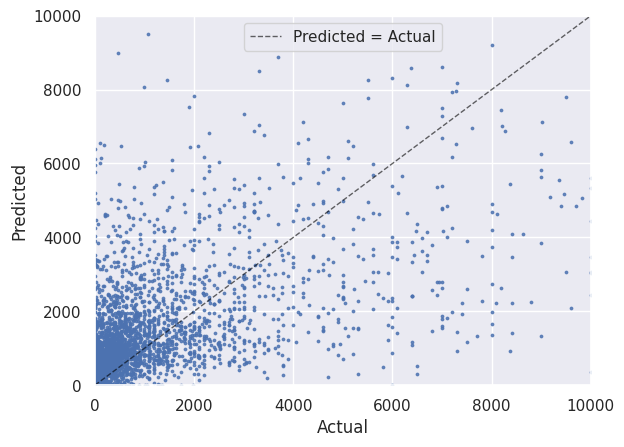

In [72]:
plt.scatter(x=y_test.to_numpy(), y=y_pre, s=3, alpha=0.8)
plt.axline((0, 0),(10000, 10000),color="black",linestyle="--",alpha=0.6,linewidth=1,label="Predicted = Actual",)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

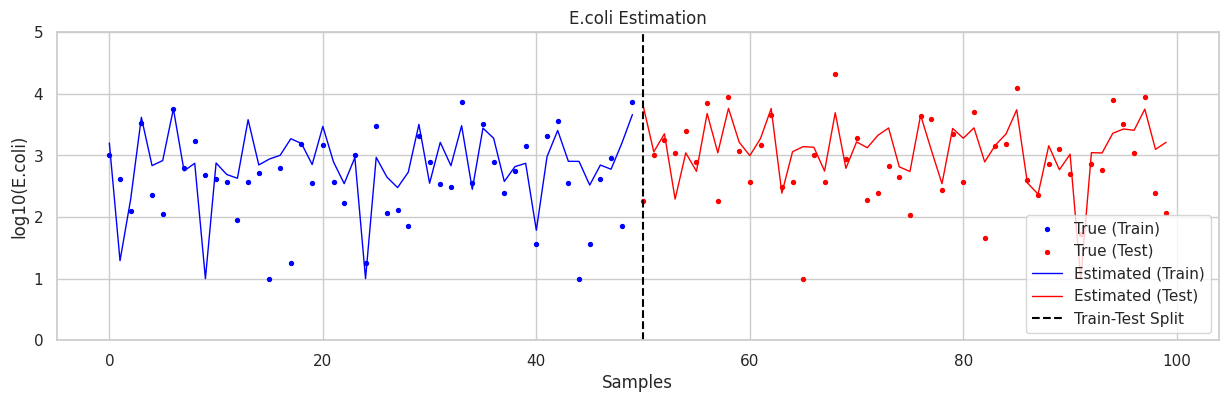

In [73]:
time = np.arange(100)

# Splitting into train and test
split_idx = len(time) // 2
i = split_idx
time_train, time_test = time[:split_idx], time[split_idx:]

tr = Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1))[:i]
tst = y_pre[:i]
tr[tr<10] = 10
tst[tst<10] = 10

# Plot setup
plt.figure(figsize=(15, 4))
sns.set_style("whitegrid")

# Plot true values as dots
plt.scatter(time_train, np.log10(y_train[:i]), color="blue", label="True (Train)", s=8)
plt.scatter(time_test,np.log10(y_test.to_numpy()[:i]), color="red", label="True (Test)", s=8)

# Plot estimated values as a continuous line
plt.plot(time_train,np.log10(tr), color="blue", label="Estimated (Train)", linewidth=1)
plt.plot(time_test,np.log10(tst), color="red", label="Estimated (Test)", linewidth=1)

# Vertical dashed line to mark train-test split
plt.axvline(x=split_idx, color="black", linestyle="--", linewidth=1.5, label="Train-Test Split")

# Labels and legend
plt.xlabel("Samples")
plt.ylabel("log10(E.coli)")
plt.title("E.coli Estimation")
plt.ylim(0, 5)
plt.legend()
plt.show()

### Three classes confusion matrix

col_0          low  moderate      high
row_0                                 
high      0.283093  0.476024  0.824859
moderate  0.529489  0.474281  0.160613
low       0.187418  0.049695  0.014528

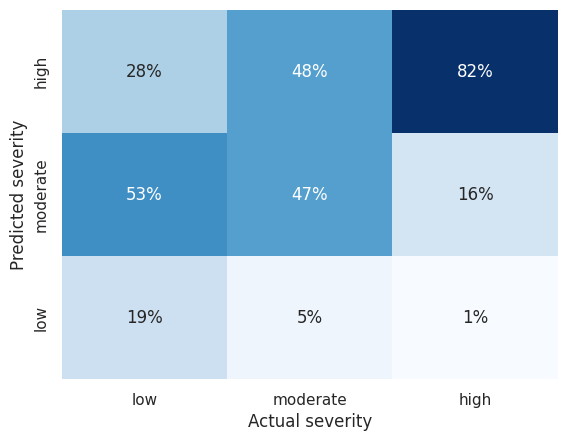

In [74]:
# three classes (x<235, 235<x<1000, 1000<x)
yt_severity = y_test.astype(float).apply(lambda x: ("low" if (x <235)
                                                    else("moderate" if  (1000>=x>=235)
                                                         else "high")))
yp_severity = pd.DataFrame({'ecoli': y_pre.reshape(-1)})['ecoli'].astype(float).apply(lambda x: ("low" if (x <235)
                                                    else("moderate" if  (1000>=x>=235)
                                                         else "high")))

to_plot = pd.crosstab(yp_severity.to_numpy(), yt_severity.to_numpy())
SEVERITY_LEFT_EDGES = {"low": 1, "moderate": 2, "high": 3}
SEVERITY_LEVEL_NAMES = list(SEVERITY_LEFT_EDGES.keys())

# make sure crosstab is even on both axes
for level in SEVERITY_LEVEL_NAMES:
    if level not in to_plot.index:
        to_plot.loc[level, :] = 0
    if level not in to_plot.columns:
        to_plot[level] = 0

# reverse index order for plotting
to_plot = to_plot.loc[SEVERITY_LEVEL_NAMES[::-1], SEVERITY_LEVEL_NAMES]
fmt = ",.0f"

normalize = True
if normalize:
    to_plot = to_plot / to_plot.sum()
    fmt = ".0%"

sns.heatmap(to_plot, cmap="Blues", annot=True, fmt=fmt, cbar=False)
plt.xlabel("Actual severity")
plt.ylabel("Predicted severity")
to_plot

### Two classes confusion matrix

col_0         low-moderate  high
row_0                           
high                   737  1047
low-moderate          1138   227
Performance accuracy: 0.69387


Text(46.24999999999999, 0.5, 'Predicted severity')

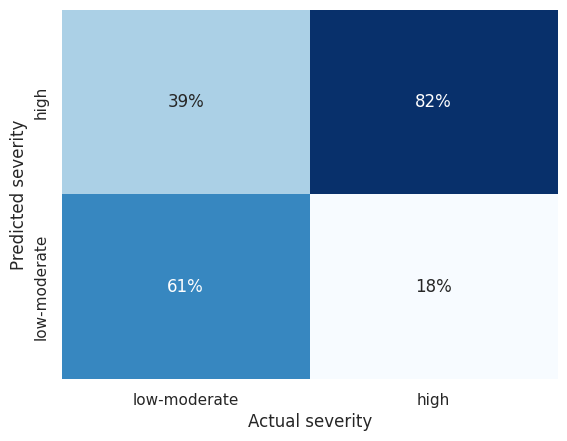

In [75]:
# two classes (x<thr, thr<x)
# U can change the threshold by choosing "thr" value
thr = 1000
yt_severity = y_test.astype(float).apply(lambda x: ("low-moderate" if (x <thr)
                                                         else "high"))
yp_severity = pd.DataFrame({'ecoli': y_pre.reshape(-1)})['ecoli'].astype(float).apply(
    lambda x: ("low-moderate" if (x <thr) else "high"))

to_plot = pd.crosstab(yp_severity.to_numpy(), yt_severity.to_numpy())
SEVERITY_LEFT_EDGES = {"low-moderate": 1, "high": 2}
SEVERITY_LEVEL_NAMES = list(SEVERITY_LEFT_EDGES.keys())

# make sure crosstab is even on both axes
for level in SEVERITY_LEVEL_NAMES:
    if level not in to_plot.index:
        to_plot.loc[level, :] = 0
    if level not in to_plot.columns:
        to_plot[level] = 0

# reverse index order for plotting
to_plot = to_plot.loc[SEVERITY_LEVEL_NAMES[::-1], SEVERITY_LEVEL_NAMES]
fmt = ",.0f"
print(to_plot)
print("Performance accuracy: %.5f" % ((to_plot['high']['high'] + to_plot['low-moderate']['low-moderate'])/y_test.size))
Accuarcy = ((to_plot['high']['high'] + to_plot['low-moderate']['low-moderate'])/y_test.size)

normalize = True
if normalize:
    to_plot = to_plot / to_plot.sum()#.sum()
    fmt = ".0%"

sns.heatmap(to_plot, cmap="Blues", annot=True, fmt=fmt, cbar=False)
plt.xlabel("Actual severity")
plt.ylabel("Predicted severity")

# Histogram on Error

## Generate Abs of Error data for the histogram

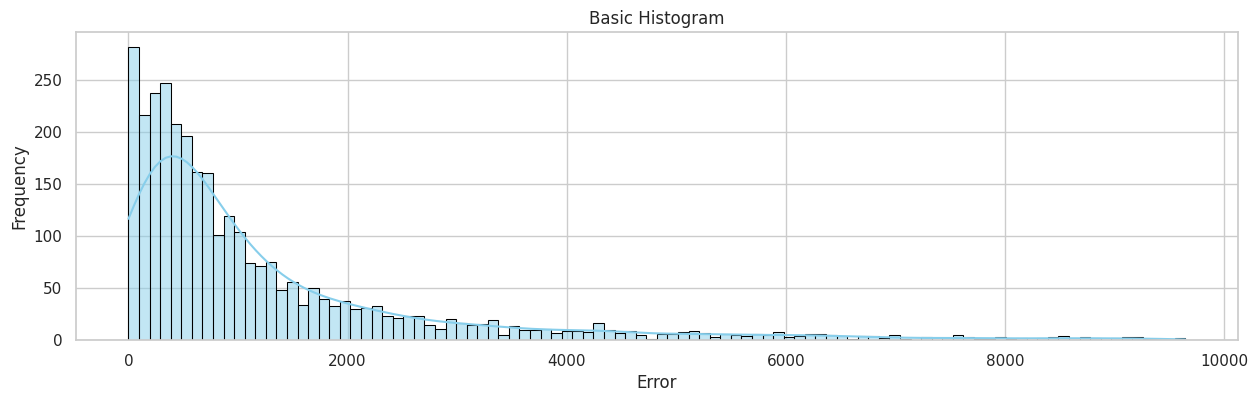

In [76]:
# Generate Abs of Error data for the histogram
abs_erorr = np.abs(y_test1-y_pre[:,0])
 
# Plotting a histogram
plt.figure(figsize=(15, 4))
sns.histplot(abs_erorr, bins=100, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

## Histogram on the Mean of Error

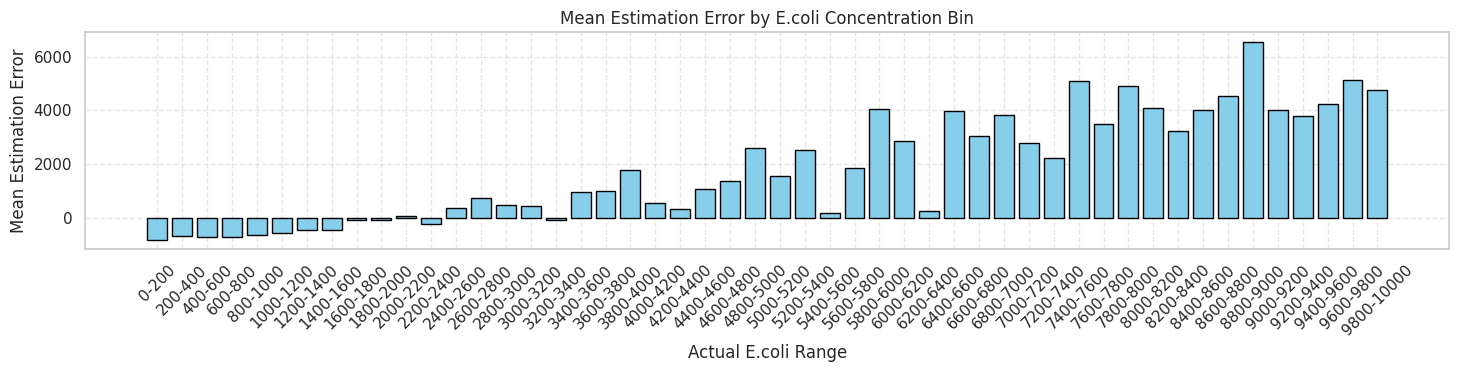

In [21]:
# Define signal strength bins 
bins = np.arange(0, 10200, 200)  

erorr = y_test1-y_pre[:,0]
 

# Digitize signal strength into bin indices
bin_indices = np.digitize(y_test1, bins)

# Compute mean error for each bin
mean_errors = []
bin_labels = []

for i in range(1, len(bins)):
    in_bin = bin_indices == i
    if np.any(in_bin):
        mean_error = np.mean(erorr[in_bin])
        mean_errors.append(mean_error)
        bin_labels.append(f"{bins[i-1]}-{bins[i]}")
    else:
        mean_errors.append(0)
        bin_labels.append(f"{bins[i-1]}-{bins[i]}")

# Plotting
plt.figure(figsize=(15, 4))
plt.bar(bin_labels, mean_errors, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Actual E.coli Range')
plt.ylabel('Mean Estimation Error')
plt.title('Mean Estimation Error by E.coli Concentration Bin')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Histogram on the Abd. Mean of Error

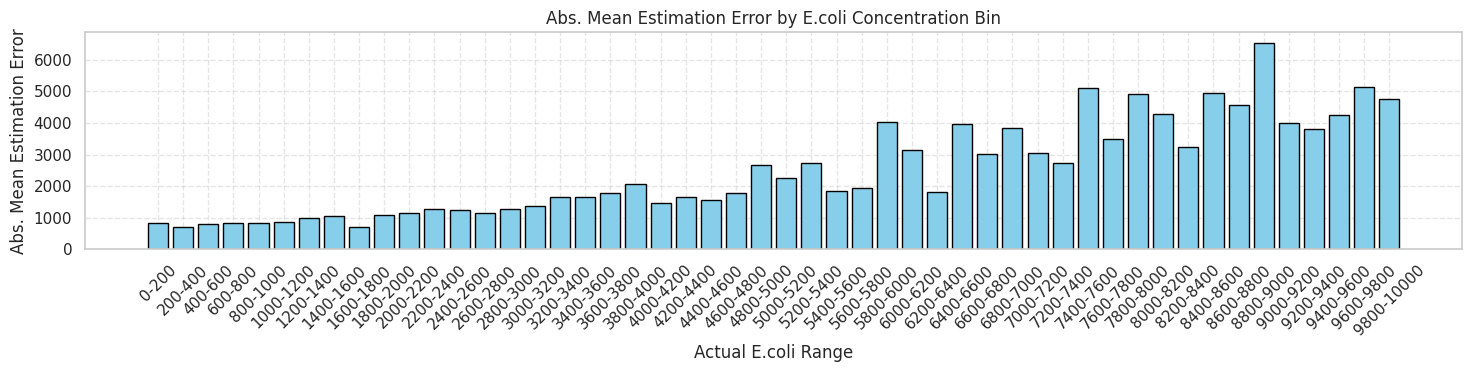

In [22]:
# Define signal strength bins 
bins = np.arange(0, 10200, 200)  

# Digitize signal strength into bin indices
bin_indices = np.digitize(y_test1, bins)

# Compute mean error for each bin
mean_errors = []
bin_labels = []

for i in range(1, len(bins)):
    in_bin = bin_indices == i
    if np.any(in_bin):
        mean_error = np.mean(abs_erorr[in_bin])
        mean_errors.append(mean_error)
        bin_labels.append(f"{bins[i-1]}-{bins[i]}")
    else:
        mean_errors.append(0)
        bin_labels.append(f"{bins[i-1]}-{bins[i]}")

# Plotting
plt.figure(figsize=(15, 4))
plt.bar(bin_labels, mean_errors, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Actual E.coli Range')
plt.ylabel('Abs. Mean Estimation Error')
plt.title('Abs. Mean Estimation Error by E.coli Concentration Bin')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Generate the distribution data in histogram format

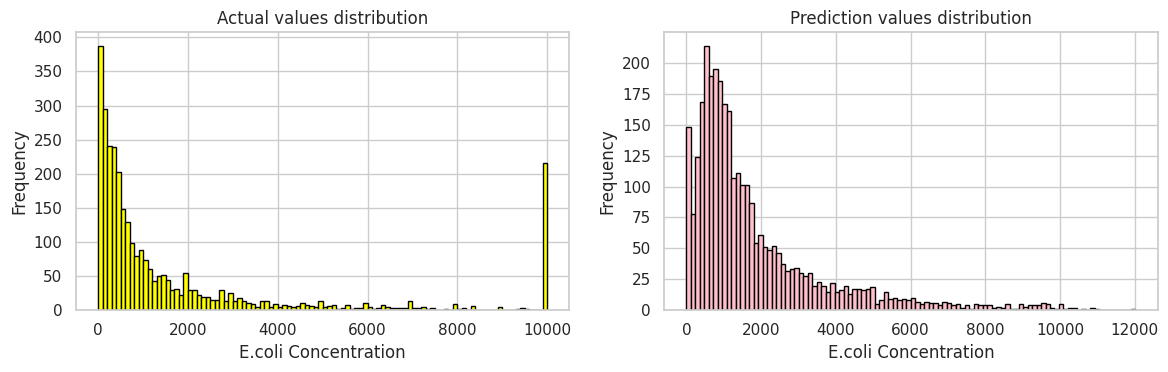

In [23]:
# Generate the distribution data in histogram format
pre = y_pre[:,0]
# Plotting a histogram
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
 
axes[0].hist(y_test1, bins=100, color='Yellow', edgecolor='black')
axes[0].set_title('Actual values distribution')
 
axes[1].hist(pre, bins=100, color='Pink', edgecolor='black')
axes[1].set_title('Prediction values distribution')
 
# Adding labels and title
for ax in axes:
    ax.set_xlabel('E.coli Concentration')
    ax.set_ylabel('Frequency')
    
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

# Precision-Recall and ROC curves 

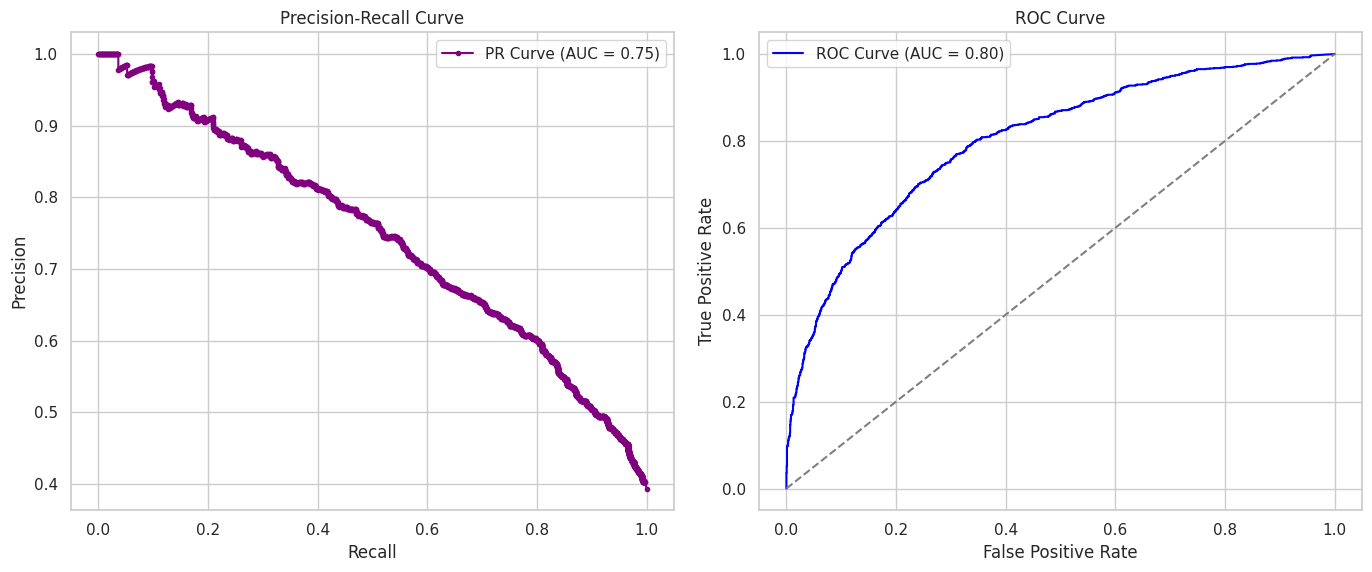

In [24]:
# Define a threshold to create binary classification labels
# y_true > 1000 as the positive class for E.coli
binary_true = (y_test > 1000).astype(int)

# Precision-Recall Curve
precision_xgr, recall_xgr, pr_thresholds_xgr = precision_recall_curve(binary_true, y_pre.reshape(-1))
pr_auc_xgr = auc(recall_xgr, precision_xgr)

# ROC Curve
fpr_xgr, tpr_xgr, roc_thresholds_xgr = roc_curve(binary_true, Scaler1.inverse_transform(y_pre.reshape(-1, 1)).reshape(-1))
roc_auc_xgr = auc(fpr_xgr, tpr_xgr)

# 4. Plotting
plt.figure(figsize=(14, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall_xgr, precision_xgr, label=f'PR Curve (AUC = {pr_auc_xgr:.2f})', marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_xgr, tpr_xgr, color='blue', label=f'ROC Curve (AUC = {roc_auc_xgr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Other acuuracy metrics

three other Accuracy metrics. 

In [25]:
tst = y_test.to_numpy().copy()
pre = y_pre.reshape(-1).copy()
tst[tst<10] = 10
tst[tst>10000] = 10000
pre[pre<10] = 10
pre[pre>10000] = 10000

# Accuracy = (1 - sMAPE) * 100
print("Accuracy = (1 - sMAPE) * 100 = %.5f" % (( np.mean(np.abs(tst - pre) / ((np.abs(tst)+np.abs(pre))/2))) * 100),"%")

# Percentage of estimations within a certain error margin.
# Accuracy = (number of estimations with error < thr)/ all samples
thr = 0.4
tst = np.log10(tst)
pre = np.log10(pre)
error = (np.abs(pre - tst))
print("Accuracy = number of estimations with error < 0.4)/ all samples = %.5f" % ((error < thr).sum()/len(error)*100),"%")

# threshold based accuracy. precentage of estimation with error < thr of actual value
thr = 0.05
error = np.abs(pre - tst) < 0.2 * tst
print("Accuracy = precentage of estimation with error < 20 percent of actual value = %.5f" % (error.sum()/len(tst)*100),"%")

Accuracy = (1 - sMAPE) * 100 = 84.05051 %
Accuracy = number of estimations with error < 0.4)/ all samples = 54.84281 %
Accuracy = precentage of estimation with error < 20 percent of actual value = 68.68847 %


In [484]:
"""for i in range(10):
    print(error[i], pre[i], tst[i],10**pre[i], 10**tst[i])"""

'for i in range(10):\n    print(error[i], pre[i], tst[i],10**pre[i], 10**tst[i])'

In [226]:
np.isnan(np.abs(tst - pre) / tst).sum()

0

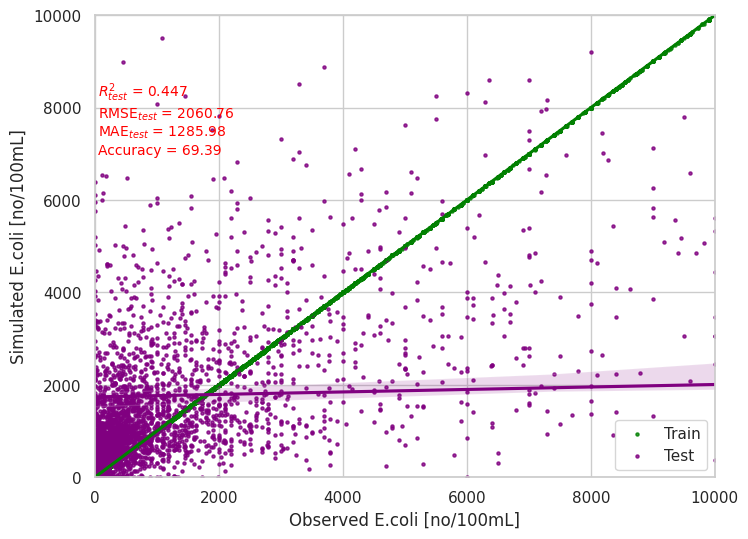

In [26]:
# Calculating metrics
r2_train = r2_score(Scaler1.inverse_transform(y_trainN).reshape(-1, 1),
                                                        Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1)))
r2_test = r2_score(y_test1, y_pre)
mae_test = mean_absolute_error(y_test1, y_pre)
rmse_train = np.sqrt(mean_squared_error(Scaler1.inverse_transform(y_trainN).reshape(-1, 1),
                                                        Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1))))
rmse_test = np.sqrt(mean_squared_error(y_test1, y_pre))

# Creating the plot
plt.figure(figsize=(8, 6))

# Plot train data
sns.regplot(x=y_train, y=Scaler1.inverse_transform(y_trainN).reshape(-1, 1), scatter_kws={'color':'green', 's':5}, line_kws={'color':'green'}, label='Train')

# Plot test data
sns.regplot(x=y_test, y=y_pre, scatter_kws={'color':'purple', 's':5}, line_kws={'color':'purple'}, label='Test')

# Adding text with metrics
plt.text(50, 7000, f'$R^2_{{test}}$ = {r2_test:.3f}\nRMSE$_{{test}}$ = {rmse_test:.2f}\nMAE$_{{test}}$ = {mae_test:.2f}\nAccuracy = {Accuarcy*100:.2f}', fontsize=10, color='Red')

# Labels and Title
plt.xlabel('Observed E.coli [no/100mL]')
plt.ylabel('Simulated E.coli [no/100mL]')
plt.xlim(0, 10000)
plt.ylim(0, 10000)
#plt.title('Extreme Gradient Boosting')

plt.legend()
plt.show()

## LGBM model for E.coli Estimator

LightGBM (Light Gradient Boosting Machine) is another gradient boosting framework optimized for speed and performance on large datasets.

In [65]:
# LGBM model for E.coli Estimator
# Evaluate with the above cell 3 cells
import lightgbm as lgb
hyper_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.02, #0.005
    'feature_fraction': 0.7,
    #'bagging_fraction': 0.7,
    #'bagging_freq': 10,
    'verbose': 0,
    "max_depth": -1,
    "num_leaves": 15,  # 31
    #"max_bin": 512,
    "num_iterations": 550} # 2550
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_trainN, y_trainN
        #eval_set=[(X_testN, y_testN)],
        #eval_metric='l1',
        #callbacks=[lgb.early_stopping(stopping_rounds=10),]
       )
y_pre_tr = gbm.predict(X_trainN
                       #num_iteration=gbm.best_iteration_
                      )
#print('Train RMSE:{}'.format(np.sqrt(mean_squared_error(y_train, y_pre_tr))))
print('Train RMSE:{}'.format(np.sqrt(mean_squared_error(Scaler1.inverse_transform(y_trainN).reshape(-1, 1),
                                                        Scaler1.inverse_transform(y_pre_tr.reshape(-1, 1))))))
y_pre = gbm.predict(X_testN)
y_pre = Scaler1.inverse_transform(y_pre.reshape(-1, 1))
y_pre[y_pre<0] = 0 # replace negative prediction with zero

print('Test RMSE:{}'.format(np.sqrt(mean_squared_error(y_test.to_numpy(),
                                                        y_pre))))

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
Train RMSE:1771.6478927109738
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
Test RMSE:18961.71012276682


col_0          low  moderate      high
row_0                                 
high      0.296199  0.496949  0.848265
moderate  0.634338  0.493461  0.150928
low       0.069463  0.009590  0.000807

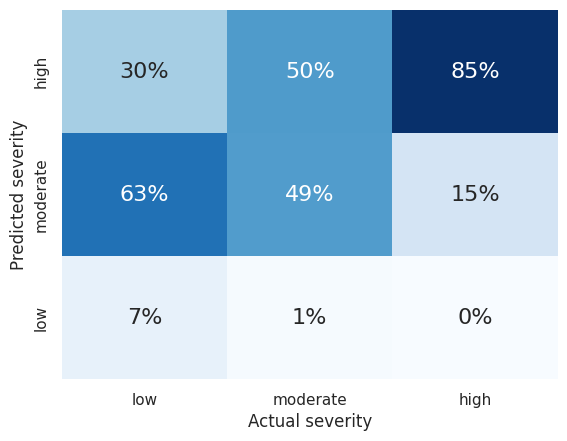

In [28]:
# three classes (x<235, 235<x<1000, 1000<x)
yt_severity = y_test.astype(float).apply(lambda x: ("low" if (x <235)
                                                    else("moderate" if  (1000>=x>=235)
                                                         else "high")))
yp_severity = pd.DataFrame({'ecoli': y_pre.reshape(-1)})['ecoli'].astype(float).apply(lambda x: ("low" if (x <235)
                                                    else("moderate" if  (1000>=x>=235)
                                                         else "high")))

to_plot = pd.crosstab(yp_severity.to_numpy(), yt_severity.to_numpy())
SEVERITY_LEFT_EDGES = {"low": 1, "moderate": 2, "high": 3}
SEVERITY_LEVEL_NAMES = list(SEVERITY_LEFT_EDGES.keys())

# make sure crosstab is even on both axes
for level in SEVERITY_LEVEL_NAMES:
    if level not in to_plot.index:
        to_plot.loc[level, :] = 0
    if level not in to_plot.columns:
        to_plot[level] = 0

# reverse index order for plotting
to_plot = to_plot.loc[SEVERITY_LEVEL_NAMES[::-1], SEVERITY_LEVEL_NAMES]
fmt = ",.0f"

normalize = True
if normalize:
    to_plot = to_plot / to_plot.sum()
    fmt = ".0%"

sns.heatmap(to_plot, cmap="Blues", annot=True, fmt=fmt, cbar=False)
plt.xlabel("Actual severity")
plt.ylabel("Predicted severity")
to_plot

col_0         low-moderate  high
row_0                           
high                   772  1075
low-moderate          1103   199
Performance accuracy: 0.69165


Text(46.24999999999999, 0.5, 'Predicted severity')

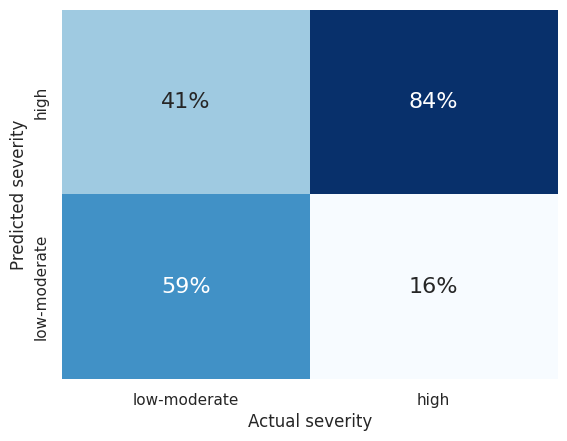

In [29]:
# two classes (x<thr, thr<x)
# U can change the threshold by choosing "thr" value
thr = 1000
yt_severity = y_test.astype(float).apply(lambda x: ("low-moderate" if (x <thr)
                                                         else "high"))
yp_severity = pd.DataFrame({'ecoli': y_pre.reshape(-1)})['ecoli'].astype(float).apply(
    lambda x: ("low-moderate" if (x <thr) else "high"))

to_plot = pd.crosstab(yp_severity.to_numpy(), yt_severity.to_numpy())
SEVERITY_LEFT_EDGES = {"low-moderate": 1, "high": 2}
SEVERITY_LEVEL_NAMES = list(SEVERITY_LEFT_EDGES.keys())

# make sure crosstab is even on both axes
for level in SEVERITY_LEVEL_NAMES:
    if level not in to_plot.index:
        to_plot.loc[level, :] = 0
    if level not in to_plot.columns:
        to_plot[level] = 0

# reverse index order for plotting
to_plot = to_plot.loc[SEVERITY_LEVEL_NAMES[::-1], SEVERITY_LEVEL_NAMES]
fmt = ",.0f"
print(to_plot)
print("Performance accuracy: %.5f" % ((to_plot['high']['high'] + to_plot['low-moderate']['low-moderate'])/y_test.size))
Accuarcy = ((to_plot['high']['high'] + to_plot['low-moderate']['low-moderate'])/y_test.size)

normalize = True
if normalize:
    to_plot = to_plot / to_plot.sum()#.sum()
    fmt = ".0%"

sns.heatmap(to_plot, cmap="Blues", annot=True, fmt=fmt, cbar=False)
plt.xlabel("Actual severity")
plt.ylabel("Predicted severity")

## LinearRegression model for E.coli Estimator

A simple statistical model that predicts E. coli levels based on a weighted sum of input features. It serves as a baseline comparison for more complex models. It capable of provide suitable performance when there are strong linear correlation, but in the case of estimation of E.coli is failed.

Test RMSE:19204.721213791272


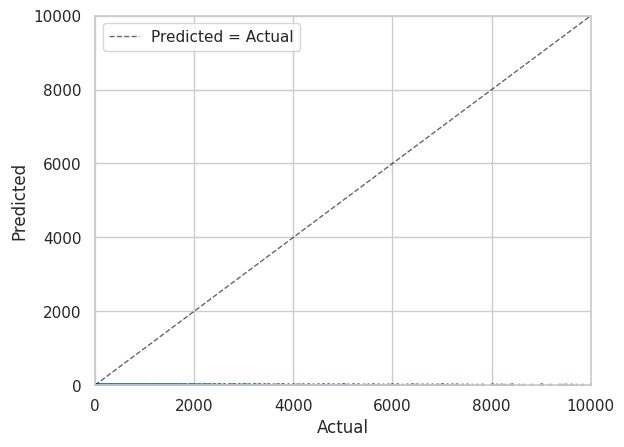

In [30]:
# LinearRegression model for E.coli Estimator
Linear_reg = LinearRegression()
Linear_reg.fit(X_trainN, y_trainN)
y_pre = Linear_reg.predict(X_testN)
print('Test RMSE:{}'.format(np.sqrt(mean_squared_error(y_test.to_numpy(),
                                                        Scaler1.inverse_transform(y_pre.reshape(-1, 1))))))
plt.scatter(x=y_test.to_numpy(), y=y_pre, s=3, alpha=0.8)
plt.axline((0, 0),(10000, 10000),color="black",linestyle="--",alpha=0.6,linewidth=1,label="Predicted = Actual",)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

## MLP model for E.coli Estimator

A Multi-Layer Perceptron (MLP) is a type of neural network used for regression. It consists of 3 layers of neurons and can capture complex relationships in the data.

In [31]:
# MLP model for E.coli Estimator
historymlp = History()
model3 = Sequential()
model3.add(Dense(25, activation='relu'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='linear'))
opt = keras.optimizers.RMSprop(learning_rate=0.002)
model3.compile(loss='mse', optimizer=opt)
#model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model3.fit(X_trainN, (y_trainN), epochs=100, batch_size=16, validation_split=0.2, verbose=1, shuffle=True, 
          callbacks = [historymlp, keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')])

Epoch 1/100


2025-07-04 12:21:40.797383: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


892/892 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9344 - val_loss: 0.8150
Epoch 2/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8317 - val_loss: 0.8065
Epoch 3/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8005 - val_loss: 0.7986
Epoch 4/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7558 - val_loss: 0.7516
Epoch 5/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7236 - val_loss: 0.7492
Epoch 6/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7255 - val_loss: 0.8034
Epoch 7/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6896 - val_loss: 0.7379
Epoch 8/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7069 - val_loss: 0.7159
Epoch 9/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6853 - val_loss: 0.7089
Epoch 10/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6792 - val_loss: 0.7414
Epoch 11/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6938 - val_loss: 0.7071
Epoch 12/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

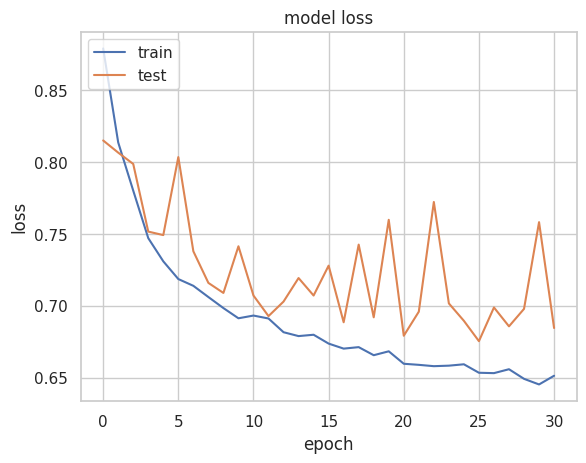

In [32]:
plt.plot(historymlp.history['loss'])
plt.plot(historymlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test RMSE:19048.383290128302


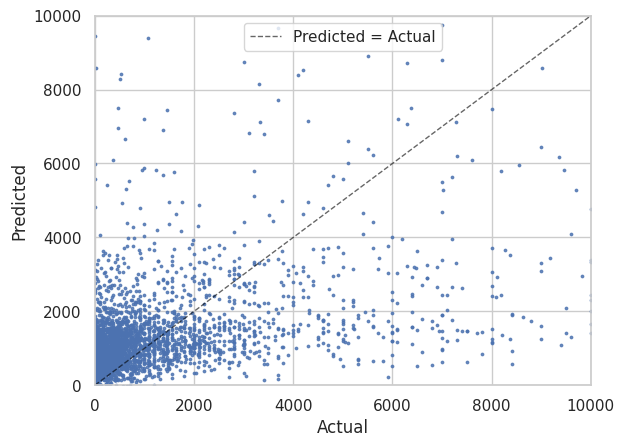

In [33]:
y_pre_testmlp = model3.predict(X_testN)
print('Test RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, Scaler1.inverse_transform(y_pre_testmlp.reshape(-1, 1))))))
plt.scatter(x=y_test.to_numpy(), y=Scaler1.inverse_transform(y_pre_testmlp.reshape(-1, 1)), s=3, alpha=0.8)
plt.axline((0, 0),(10000, 10000),color="black",linestyle="--",alpha=0.6,linewidth=1,label="Predicted = Actual",)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

col_0         low-moderate  high
row_0                           
high                   876  1012
low-moderate           999   262
Performance accuracy: 0.63862


Text(46.24999999999999, 0.5, 'Predicted severity')

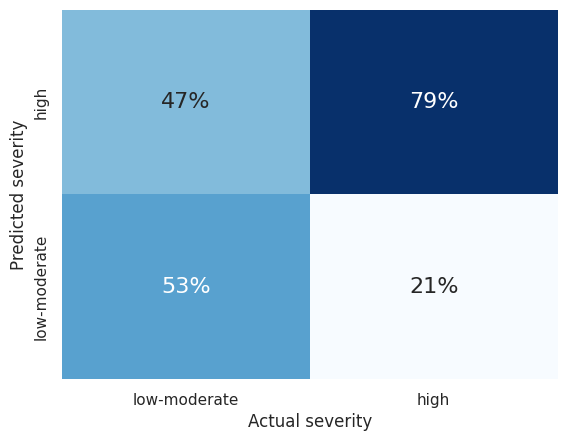

In [34]:
thr = 1000
yt_severity = y_test.astype(float).apply(lambda x: ("low-moderate" if (x <thr)
                                                         else "high"))
yp_severity = pd.DataFrame({'ecoli': Scaler1.inverse_transform(y_pre_testmlp.reshape(-1, 1)).reshape(-1)})['ecoli'].astype(float).apply(lambda x: ("low-moderate" if (x <thr)
                                                         else "high"))

to_plot = pd.crosstab(yp_severity.to_numpy(), yt_severity.to_numpy())
SEVERITY_LEFT_EDGES = {"low-moderate": 1, "high": 2}
SEVERITY_LEVEL_NAMES = list(SEVERITY_LEFT_EDGES.keys())

# make sure crosstab is even on both axes
for level in SEVERITY_LEVEL_NAMES:
    if level not in to_plot.index:
        to_plot.loc[level, :] = 0
    if level not in to_plot.columns:
        to_plot[level] = 0

        
# reverse index order for plotting
to_plot = to_plot.loc[SEVERITY_LEVEL_NAMES[::-1], SEVERITY_LEVEL_NAMES]
fmt = ",.0f"
print(to_plot)
print("Performance accuracy: %.5f" % ((to_plot['high']['high'] + to_plot['low-moderate']['low-moderate'])/y_test.size))


normalize = True
if normalize:
    to_plot = to_plot / to_plot.sum()
    fmt = ".0%"

sns.heatmap(to_plot, cmap="Blues", annot=True, fmt=fmt, cbar=False)
plt.xlabel("Actual severity")
plt.ylabel("Predicted severity")


## XGBRegressor model for E.coli Estimator with cross validation

This extends the XGBoost model with cross-validation (CV), ensuring that the model's performance is evaluated across multiple subsets of the data to avoid overfitting.

In [35]:
# XGBRegressor model for E.coli Estimator with cross validation
#skf = StratifiedKFold(n_splits=5, random_state=40, shuffle=True)
skf = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=40)
# Parameter dictionary specifying base learner 
param = { "objective":"reg:squarederror"} 

trained_models = []
scores = []
for i, (train_idx, valid_idx) in enumerate(skf.split(X_train.to_numpy(), pd.DataFrame({'E.coli C-MF': y_train}))):
#for train_idx, valid_idx in skf.split(y_train.to_numpy(), y_train.to_numpy()):
    
    # Train model on fold
    train_split_features = X_train.iloc[train_idx]
    valid_split_features = X_train.iloc[valid_idx]
    train_label_features = pd.DataFrame({'E.coli C-MF': y_train}).iloc[train_idx]
    valid_label_features = pd.DataFrame({'E.coli C-MF': y_train}).iloc[valid_idx]
    
    train_dmatrix = xg.DMatrix(data = train_split_features, label = train_label_features) 
    valid_dmatrix = xg.DMatrix(data = valid_split_features, label = valid_label_features) 
    
    eval_set = [(valid_dmatrix,'eval'), (train_dmatrix,'train')] 
    
    #model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

    trained_model = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 50, evals=eval_set, early_stopping_rounds=20) 
    
    trained_models.append(trained_model)    
    
    pred = trained_model.predict(valid_dmatrix) 
    scores.append(np.sqrt(mean_squared_error(pd.DataFrame({'E.coli C-MF': y_train}).iloc[valid_idx],pred)))
    
    # RMSE Computation 
print('Validation RMSE:{}'.format(sum(scores) / len(scores)))

[0]	eval-rmse:2519.32363	train-rmse:2452.37967
[1]	eval-rmse:2359.06282	train-rmse:2264.55986
[2]	eval-rmse:2257.66626	train-rmse:2147.96637
[3]	eval-rmse:2173.73510	train-rmse:2050.88582
[4]	eval-rmse:2138.63317	train-rmse:1989.75115
[5]	eval-rmse:2107.53351	train-rmse:1942.41790
[6]	eval-rmse:2094.27501	train-rmse:1905.26325
[7]	eval-rmse:2064.52533	train-rmse:1872.47564
[8]	eval-rmse:2048.33883	train-rmse:1848.63698
[9]	eval-rmse:2041.54961	train-rmse:1824.43574
[10]	eval-rmse:2032.77749	train-rmse:1795.98975
[11]	eval-rmse:2024.54284	train-rmse:1777.07338
[12]	eval-rmse:2022.31366	train-rmse:1757.69469
[13]	eval-rmse:2021.66210	train-rmse:1747.24849
[14]	eval-rmse:2008.74377	train-rmse:1725.69189
[15]	eval-rmse:2007.22567	train-rmse:1707.02487
[16]	eval-rmse:2004.55110	train-rmse:1686.41567
[17]	eval-rmse:1999.56444	train-rmse:1669.66174
[18]	eval-rmse:1995.48298	train-rmse:1661.26743
[19]	eval-rmse:1990.71116	train-rmse:1645.59520
[20]	eval-rmse:1988.79318	train-rmse:1624.34164
[2

In [36]:
preds = []
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
for model in trained_models:
    preds.append(pd.Series(data=model.predict(test_dmatrix), dtype='float64'))
preds = pd.concat(preds, axis=1)
preds = preds.mean(axis=1)
preds[preds<0] = 0 # replace negative prediction with zero
# RMSE Computation 
print('Test RMSE:{}'.format(np.sqrt(mean_squared_error(y_test1,preds))))

Test RMSE:2001.5198349777493


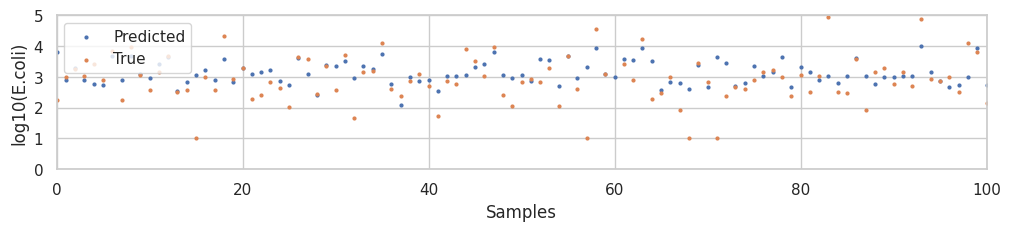

In [37]:
plt.figure(figsize=(12,2))
plt.scatter(preds.index,np.log10(preds.to_numpy()), label='Predicted', s=4)
plt.scatter(preds.index,np.log10(y_test.to_numpy()),label="True", s=4)            
plt.ylabel("log10(E.coli)")
plt.xlabel("Samples")
plt.legend(loc='upper left')
plt.ylim(0,5)
plt.xlim(0,100)
plt.show()

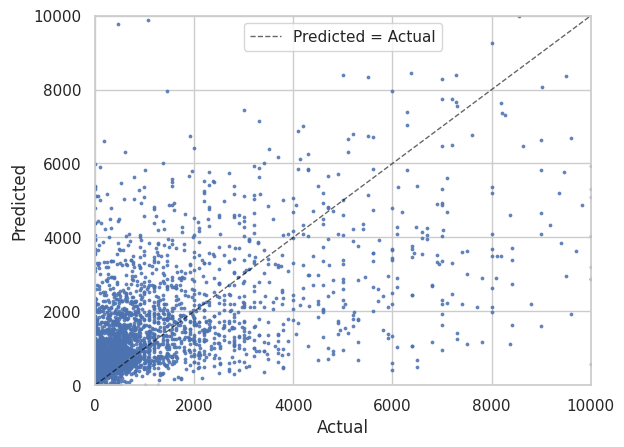

In [38]:
plt.scatter(x=y_test.to_numpy(), y=preds, s=3, alpha=0.8)
plt.axline((0, 0),(10000, 10000),color="black",linestyle="--",alpha=0.6,linewidth=1,label="Predicted = Actual",)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

Performance accuracy: 0.70657
col_0         low-moderate  high
row_0                           
high                   719  1069
low-moderate          1156   205


Text(46.24999999999999, 0.5, 'Predicted severity')

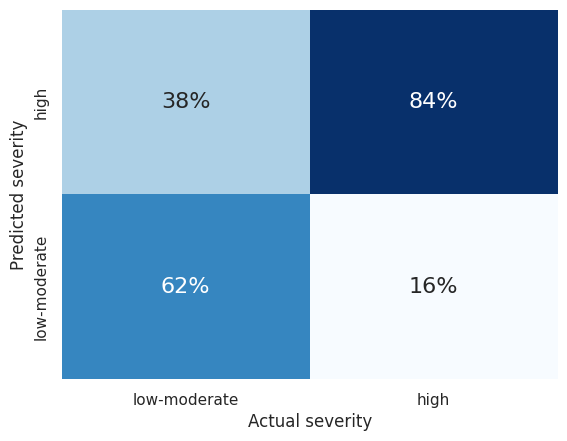

In [39]:
thr = 1000
yt_severity = y_test.astype(float).apply(lambda x: ("low-moderate" if (x <thr)
                                                         else "high"))
yp_severity = pd.DataFrame({'ecoli': preds})['ecoli'].astype(float).apply(lambda x: ("low-moderate" if (x <thr)
                                                         else "high"))

to_plot = pd.crosstab(yp_severity.to_numpy(), yt_severity.to_numpy())
SEVERITY_LEFT_EDGES = {"low-moderate": 1, "high": 2}
SEVERITY_LEVEL_NAMES = list(SEVERITY_LEFT_EDGES.keys())

# make sure crosstab is even on both axes
for level in SEVERITY_LEVEL_NAMES:
    if level not in to_plot.index:
        to_plot.loc[level, :] = 0
    if level not in to_plot.columns:
        to_plot[level] = 0

# reverse index order for plotting
to_plot = to_plot.loc[SEVERITY_LEVEL_NAMES[::-1], SEVERITY_LEVEL_NAMES]
fmt = ",.0f"
print("Performance accuracy: %.5f" % ((to_plot['high']['high'] + to_plot['low-moderate']['low-moderate'])/y_test.size))
print(to_plot)
normalize = True
if normalize:
    to_plot = to_plot / to_plot.sum()
    fmt = ".0%"

sns.heatmap(to_plot, cmap="Blues", annot=True, fmt=fmt, cbar=False)
plt.xlabel("Actual severity")
plt.ylabel("Predicted severity")

In [40]:
r2_test = r2_score(y_test1, preds)
mae_test = mean_absolute_error(y_test1, preds)
rmse_test = np.sqrt(mean_squared_error(y_test1, preds))
print(r2_test)
print(mae_test)
print(rmse_test)

0.4781535309488416
1244.7983904485932
2001.5198349777493


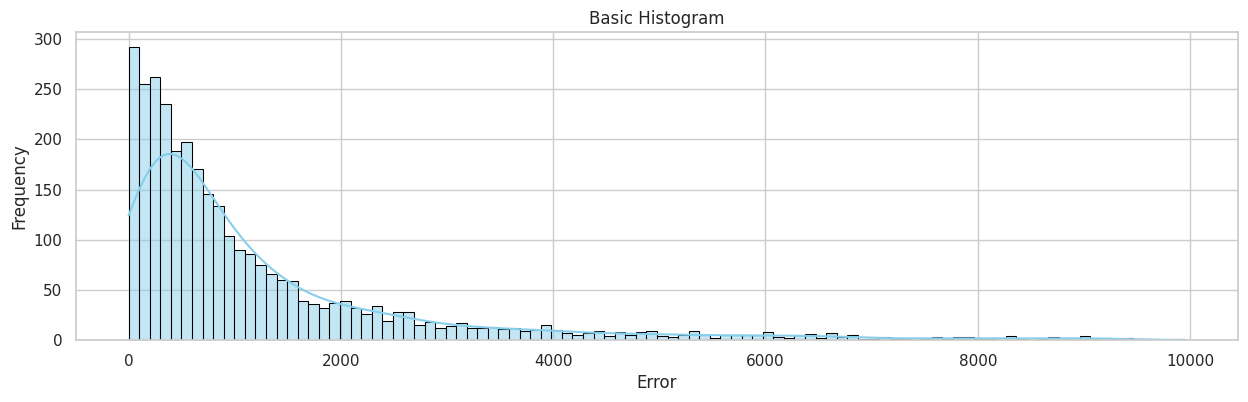

In [41]:
# Generate Abs of Erorr data for the histogram
abs_erorr = np.abs(y_test1-preds)
 
# Plotting a histogram
plt.figure(figsize=(15, 4))
sns.histplot(abs_erorr, bins=100, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

# E.coli Classifiers

Unlike the estimators, this section focuses on classification tasks, predicting whether E.coli levels exceed a certain threshold (e.g., high vs. low levels).

In [42]:
# Run this cell only if Temporal Split 
y = datasetxxt['E.coli C-MF']
thr = 1000
y = y.astype(float).apply(lambda x: (0 if (x <thr)
                                     else 1))
#X = datasetxxt[['Temp Water','Sld Sus@105C','Ammonia(N)','Nitrate-N','Lat','Long','prcp','Phosphate',
#        'date','temph','tavg', 'tavg7', 'tmin','tmax','wspd', 'presh']] # 'Temp Water','pH','O Diss %sat','Cond @ 25C', 'Ammonia(N)'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [46]:
# Run this cell only if Geographical Split 
thr = 1000
y_train = pd.DataFrame({'E.coli C-MF': y_train}).astype(float).apply(lambda x: [0 if y < thr else 1 for y in x])
y_test = pd.DataFrame({'E.coli C-MF': y_test}).astype(float).apply(lambda x: [0 if y < thr else 1 for y in x])

In [43]:
Scaler = StandardScaler().fit(X_train) # RobustScaler
X_trainN = Scaler.transform(X_train)
X_testN = Scaler.transform(X_test)

## KNeighborsClassifier

The K-Nearest Neighbors (KNN) algorithm classifies data points based on the majority class of their closest neighbors.

In [44]:
# KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_trainN,y_train)
knc_pred = knc.predict(X_testN)
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.76      1875
           1       0.68      0.38      0.49      1274

    accuracy                           0.68      3149
   macro avg       0.68      0.63      0.63      3149
weighted avg       0.68      0.68      0.65      3149



[[1646  229]
 [ 785  489]]
0.6779930136551287


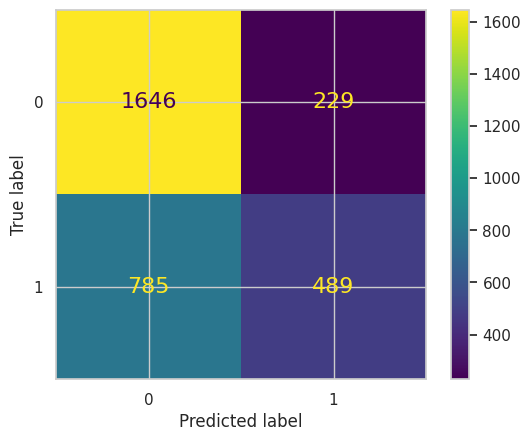

In [45]:
print(confusion_matrix(y_test,knc_pred))
print((confusion_matrix(y_test,knc_pred)[1][1] + confusion_matrix(y_test,knc_pred)[0][0])/confusion_matrix(y_test,knc_pred).sum())
ConfusionMatrixDisplay.from_estimator(knc,X_testN,y_test)

## SVC Model

Support Vector Classification (SVC) finds the best boundary (hyperplane) that separates different classes. It works well for binary classification tasks.

In [104]:
svc = SVC(C= 10, gamma= 0.6, kernel= 'rbf')
svc.fit(X_trainN,y_train)
svc_pred = svc.predict(X_testN)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76      1885
           1       0.67      0.35      0.46      1261

    accuracy                           0.67      3146
   macro avg       0.67      0.62      0.61      3146
weighted avg       0.67      0.67      0.64      3146



[[1670  215]
 [ 823  438]]
0.670057215511761


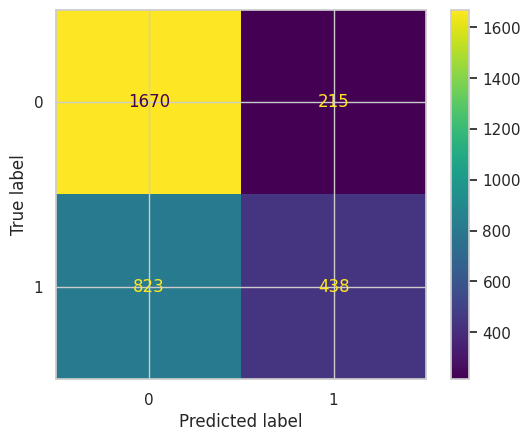

In [105]:
print(confusion_matrix(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))
ConfusionMatrixDisplay.from_estimator(svc,X_testN,y_test)

## XGBClassifier

This applies XGBoost for classification, effectively handling complex patterns in E. coli presence.

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1875
           1       0.85      0.40      0.54      1274

    accuracy                           0.73      3149
   macro avg       0.77      0.68      0.67      3149
weighted avg       0.76      0.73      0.70      3149

0.7278501111463956


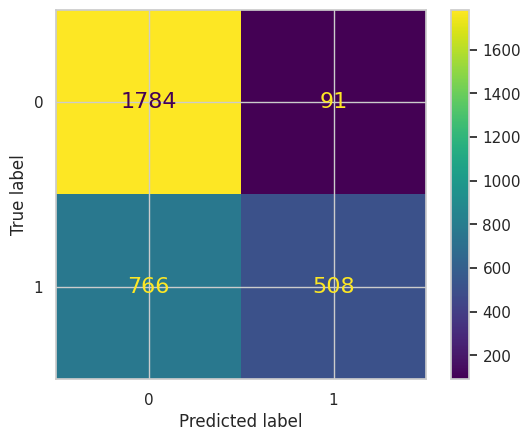

In [46]:
# XGBClassifier
param = {
    'eta': 0.1, 
    'max_depth': 15,  
    'num_class': 1,
    "min_child_weight": 15,
    "gamma": 0.4,
    "colsample_bytree": 0.27, 
    'n_estimators': 30} # 30
xgc = XGBClassifier(objective='binary:logitraw', **param)  # logitraw
xgc.fit(X_trainN,y_train)
xgc_pred = xgc.predict(X_testN)

#save model
"""
with open('modelxgb.pkl', 'wb') as f:
    pickle.dump(xgc, f)"""

print(classification_report(y_test,xgc_pred))
print(accuracy_score(y_test,xgc_pred))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,xgc_pred)).plot()

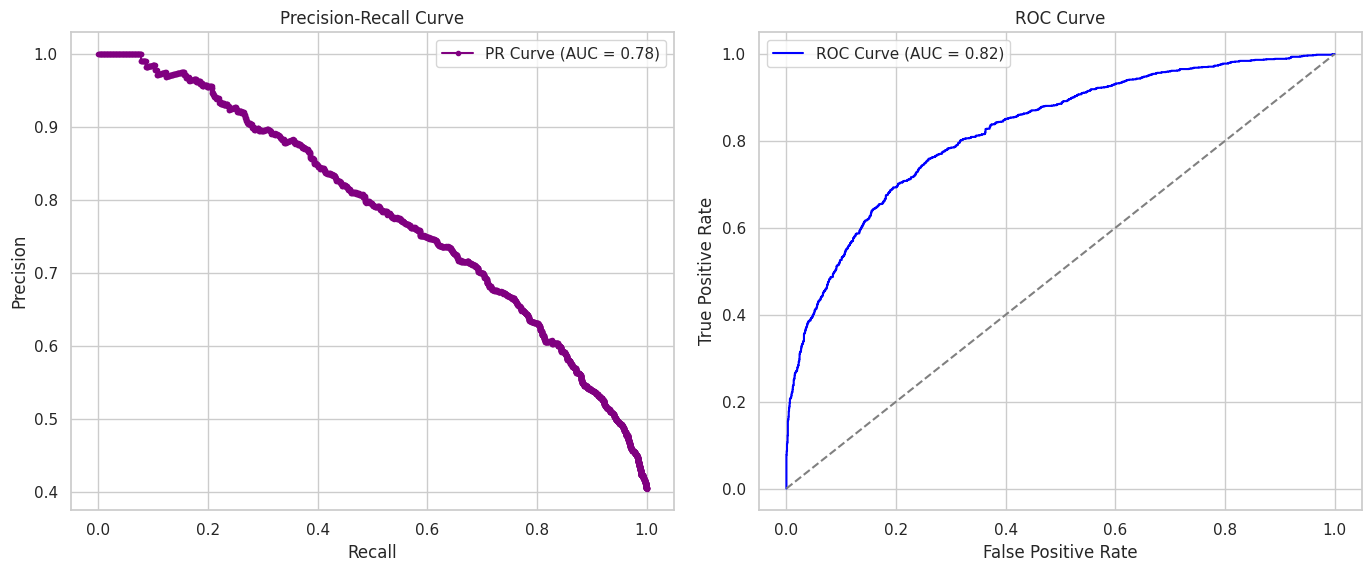

In [47]:
# Get the probobility
y_prob = xgc.predict_proba(X_testN)[:,1]

# Precision-Recall Curve
precision_xgc, recall_xgc, pr_thresholds_xgc = precision_recall_curve(y_test, y_prob)
pr_auc_xgc = auc(recall_xgc, precision_xgc)

# ROC Curve
fpr_xgc, tpr_xgc, roc_thresholds_xgc = roc_curve(y_test, y_prob)
roc_auc_xgc = auc(fpr_xgc, tpr_xgc)

# 4. Plotting
plt.figure(figsize=(14, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall_xgc, precision_xgc, label=f'PR Curve (AUC = {pr_auc_xgc:.2f})', marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_xgc, tpr_xgc, color='blue', label=f'ROC Curve (AUC = {roc_auc_xgc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## XGBClassifier with cross-validation

Similar to the regression model, this classifier uses cross-validation to improve generalization.

In [57]:
# Initialize K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=False)  # shuffle=True, random_state=42

# Lists to store metrics for each fold
rmse_list = []
mae_list = []
accuracy_list = []
f1_list = []
recall_list = []
precision_list = []
fp_list = []
fn_list = []


# Perform K-Fold Cross-Validation
trained_models = []
for train_index, val_index in kf.split(X_trainN):
    X_train_fold, X_val_fold = X_trainN[train_index], X_trainN[val_index]
    # add .iloc in case of Geographical split to y_train.reset_index(drop=True).iloc[train_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True).iloc[train_index], y_train.reset_index(drop=True).iloc[val_index] 
   
    # Initialize and train the model
    model = XGBClassifier(
    objective='binary:logitraw', 
    n_estimators=30,
    learning_rate=0.1,
    gamma=0.4,
    max_depth=15,
    colsample_bytree=0.27,
    min_child_weight=15,
    num_class=1,
    eta=0.1, 
    random_state=42
    )
    model.fit(X_train_fold, y_train_fold)
   
    # Evaluate on the test set
    y_pred = model.predict(X_testN)
    
    trained_models.append(model)   
   
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
   
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
   
    # Append metrics to lists
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    fp_list.append(fp)
    fn_list.append(fn)

# Calculate mean of each metric
mean_accuracy = np.mean(accuracy_list)
mean_f1 = np.mean(f1_list)
mean_recall = np.mean(recall_list)
mean_precision = np.mean(precision_list)
mean_fp = np.mean(fp_list)/(tn+fp+fn+tp)
mean_fn = np.mean(fn_list)/(tn+fp+fn+tp)

# Display Results
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean False Positives (FP): {mean_fp}")
print(f"Mean False Negatives (FN): {mean_fn}")

Mean Accuracy: 0.7238
Mean F1 Score: 0.6940
Mean Recall: 0.7238
Mean Precision: 0.7565
Mean False Positives (FP): 0.02870752619879327
Mean False Negatives (FN): 0.24750714512543665


## Map on Geographical Distribution of Classification Performance

This final step visualizes the model’s accuracy across different geographical locations, helping to identify spatial trends in E.coli classification accuracy.

In [58]:
# Run this cell only for Temporal split 
XX = datasetxxt.drop(['E.coli C-MF','date'], axis=1)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y, test_size=0.15, random_state=42)

In [59]:
# On result["result"]: zero means correct classification and one means worng classification

result = pd.concat([y_test, XX_test[["Lat","Long"]]], axis=1) # for Temporal split keep this line
#result = pd.concat([y_test, test[["Lat","Long"]]], axis=1) # for Geographical split keep this line
result["result"] = (result["E.coli C-MF"] ^ xgc_pred)
result.head()

E.coli C-MF        Lat      Long  result
18236            0  50.342675 -4.032678       1
14976            1  52.655073  1.206891       1
6097             1  53.825086 -2.797749       0
10610            1  50.347410 -4.051871       1
5995             1  53.837648 -2.712598       1

In [111]:
# map show locations green >75%, 75%> yellow >65%, 65%> orange >55% and 55%> red of accuracy on classification
# with 4 different size of counts
import folium
import pandas as pd
import branca.colormap as cm
from scipy import stats
from utils import getradius2

grouped_data = result[['result','Long','Lat']]
grouped_data = grouped_data.dropna().reset_index(drop=True)
grouped_data = grouped_data.groupby(["Lat", "Long"]).agg(
    ecoli_mean = ("result","mean"),
    ecoli_count = ("result","count")
).reset_index()

# Sample data generation (Replace this with your actual DataFrame)
df = grouped_data
df = df[df['Lat'] > 49.90] #Drop unwanted rows
df = df[df['Lat'] < 61] #Drop unwanted rows


m = folium.Map(location=[df['Lat'].median(), df['Long'].median()], zoom_start=5)

# green >75%, 75%> yellow >65%, 65%> orange >55% and 55%> red 
colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'], vmin=0.2, vmax=0.5)

# Add circle markers for each location
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius= getradius2(row['ecoli_count']),  # Scale the radius according to the counts
        color=colormap(row['ecoli_mean']),  # Assign color based on intensity
        fill=True,
        fill_opacity=0.6,
        popup=f"Intensity: {row['ecoli_mean']}"
    ).add_to(m)

# Save map to an HTML file
m.save('ecoli_t.html')

m